# Employee salary prediction

## Step-1: Data Cleaning

In [1]:
#Importing all the necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the csv
df=pd.read_csv("Raw_Salary_Dataset.csv")
# Looking at first 5 rows
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Race,Date_of_Birth,Marital_Status
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Black,1973-01-05,Widowed
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Hispanic,1974-09-20,Single
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Asian,1981-12-22,Divorced
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Other,1989-02-20,Married
4,52.0,Male,Master's,Director,20.0,200000.0,Hispanic,2000-04-11,Widowed


In [3]:
# Finding number of row and columns
df.shape

(392, 9)

In [4]:
# To see last 5 rows
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Race,Date_of_Birth,Marital_Status
387,80.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0,Hispanic,1987-08-01,Single
388,74.0,Female,Master's,Senior Financial Advisor,6.0,100000.0,Other,1996-02-19,Widowed
389,84.0,Female,Master's,Director of Human Capital,21.0,180000.0,Other,1980-11-21,Single
390,65.0,Female,Bachelor's,Junior Marketing Analyst,0.5,35000.0,Asian,1971-06-01,Married
391,64.0,Female,Master's,Director of Finance,20.0,180000.0,Black,1971-02-14,Married


### 1. Dimentionality reduction

In [5]:
# Finding the columns names
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Race', 'Date_of_Birth', 'Marital_Status'],
      dtype='object')

#### The columns 'Race', 'Date_of_Birth', 'Marital_Status' are not necessary for prediction of salary. DOB is not required as we have age column

In [6]:
# Dropping the unnecssary columns
df = df.drop(columns=['Race', 'Date_of_Birth', 'Marital_Status'])

In [7]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [8]:
# Finding number of duplicate rows 
df.duplicated().sum()

55

In [9]:
# Dropping those rows
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 0 to 391
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  331 non-null    float64
 1   Gender               334 non-null    object 
 2   Education Level      336 non-null    object 
 3   Job Title            333 non-null    object 
 4   Years of Experience  334 non-null    float64
 5   Salary               334 non-null    float64
dtypes: float64(3), object(3)
memory usage: 18.4+ KB


#### Let's now check if we can drop any minority values from the columns

In [11]:
print(df.Gender.value_counts())

Gender
Male      172
Female    162
Name: count, dtype: int64


In [12]:
print(df['Education Level'].value_counts())

Education Level
Bachelor's    200
Master's       94
PhD            42
Name: count, dtype: int64


In [13]:
print(df['Job Title'].value_counts())

Job Title
Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Product Manager             6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: count, Length: 174, dtype: int64


#### There are no minority values in any of the column

### 2. Handling Null Values 

In [14]:
# Finding the sum of Null values in each column
df.isnull().sum()

Age                    6
Gender                 3
Education Level        1
Job Title              4
Years of Experience    3
Salary                 3
dtype: int64

In [15]:
# Since the count of these values are very less compared to total values these can be dropped
df=df.dropna()

In [16]:
df.shape

(329, 6)

### 3. Removing outliers

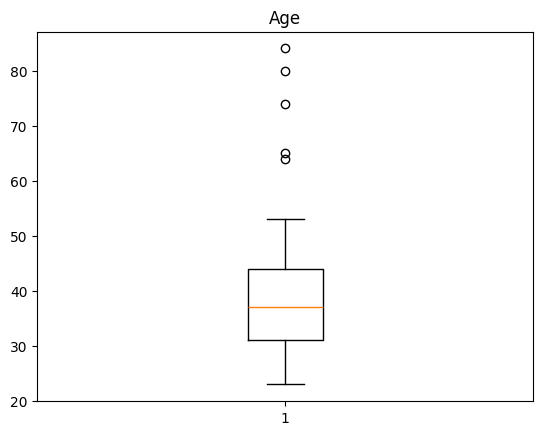

In [17]:
# Plotting boxplot of age to check wheater there are any outliers
plt.boxplot(df['Age'])
plt.title('Age')
plt.show()

#### Here we can observe that there are a  employees whose age is far beyond 60 thse values must be removed cause these might be the data of the retired employees, these rows are outliers

In [18]:
# Removing the age outliers
df=df[df["Age"]<60]

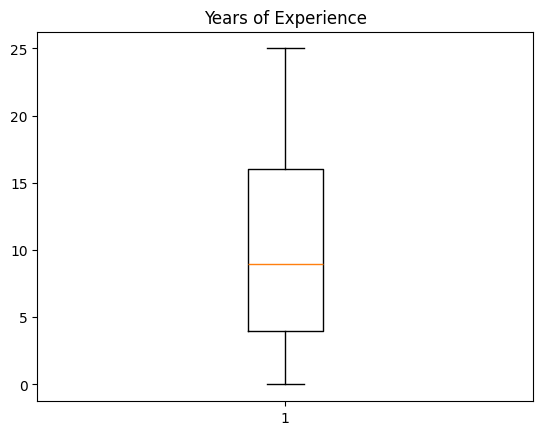

In [19]:
# Plotting boxplot of 'Years of Experience' to check wheater there are any outliers
plt.boxplot(df['Years of Experience'])
plt.title('Years of Experience')
plt.show()

#### We can observe that there are no outliers

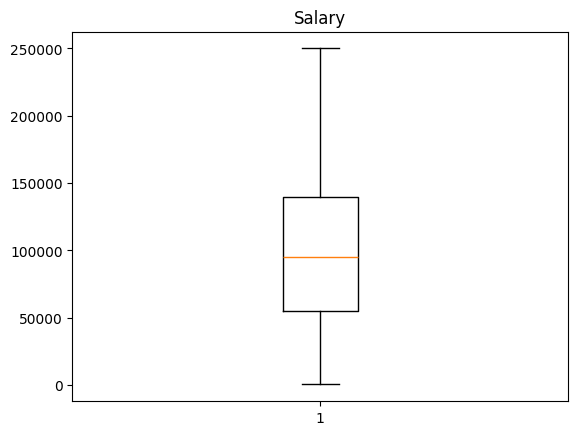

In [20]:
# Plotting boxplot of 'Salary' to check wheater there are any outliers
plt.boxplot(df['Salary'])
plt.title('Salary')
plt.show()

#### There are no outliers in salary also

In [21]:
df.shape

(324, 6)

#### Now the data is cleaned up

In [23]:
# Exporting the cleaned up csv file
df.to_csv("cleaned_salary_data.csv", index=False)

## Step-2 Data Analysis

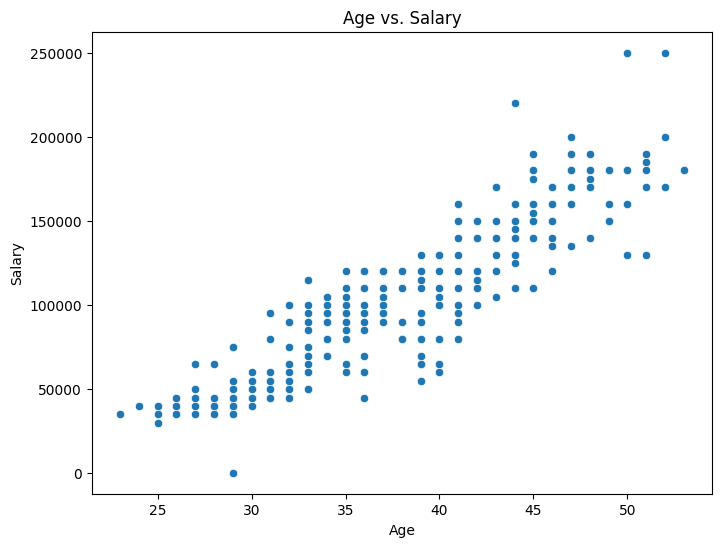

In [24]:
# Finding relation between age and salary
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title('Age vs. Salary')
plt.show()

### Observations
#### 1. As age increses salary also increses.
#### 2. The variance in salary increases with age, indicating that not all older  employees earn uniformly high salaries.


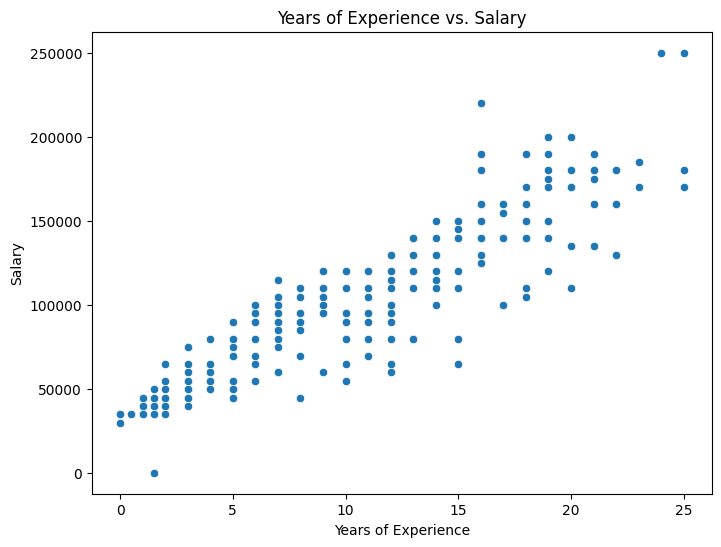

In [25]:
# Finding relation between experience and salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Years of Experience', y='Salary')
plt.title('Years of Experience vs. Salary')
plt.show()


### Observations
#### 1. As Years of Experience increases, Salary consistently rises.
#### 2. Employees with 15+ years of experience show a wider range of salaries, from moderate to very high..


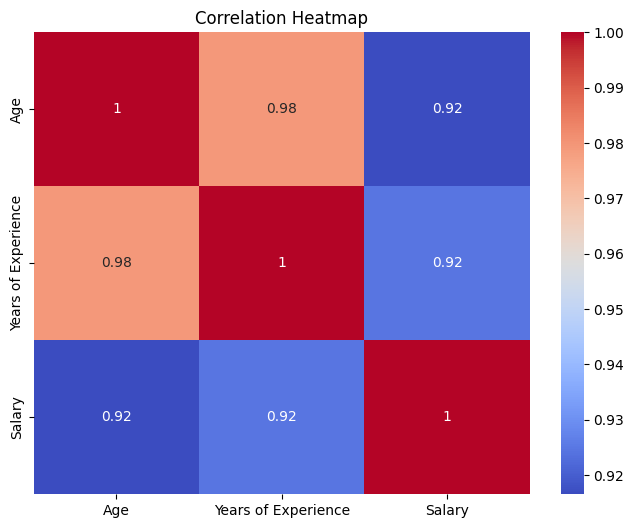

In [26]:
# Finding the impact of age and experince on salary
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Observations
#### Age does affect salary, but experience has a slightly stronger direct impact on salary. The values might be same but color difference says it all.

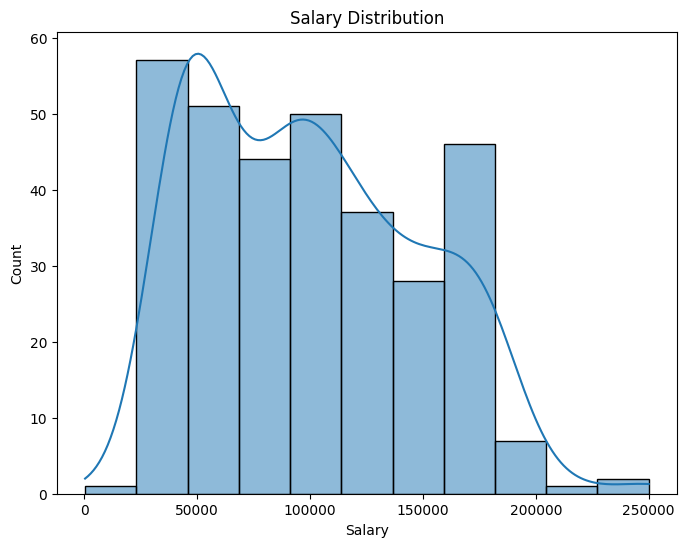

In [27]:
# Finding the salary distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.show()


### Observations
#### 1. Most of the employees are given salries between 25000 and 125000
#### 2. Only  a few number of employees are paid above 200000


## Step-3 Label encoding and scaling of data

In [28]:
# Using MinMaxScalar for scaling the numericals columns
# Using OneHotEncoder to encode the catagorical columns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


cat_cols = ["Gender", "Education Level", "Job Title"]
num_cols = ["Age", "Years of Experience"]

preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("scale", MinMaxScaler(), num_cols)
])


## Step-4 Spliting data to test and train data

In [29]:
# We split the data into 2 parts one for training and one for testing and evaluating the model
from sklearn.model_selection import train_test_split
X = df.drop("Salary", axis=1)
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step-5 Training and evaluating the model

In [30]:
# For training the model we will be using 3 types of models and choose the best one 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, algo in models.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", algo)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    r2  = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[name] = {
        "pipeline": pipe,
        "r2": r2,
        "mae": mae,
        "rmse": rmse
    }

    print(f"{name} —> R²: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")


Linear Regression —> R²: 0.8670, MAE: 12303.91, RMSE: 15851.15
Random Forest —> R²: 0.8758, MAE: 10574.67, RMSE: 15319.81
XGBoost —> R²: 0.8847, MAE: 10298.64, RMSE: 14758.47


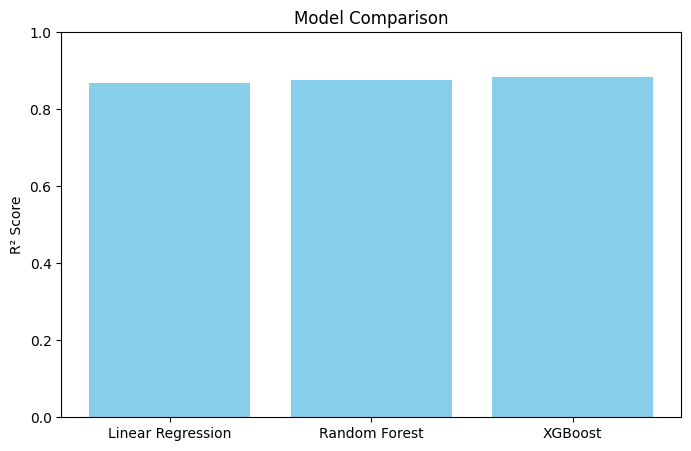

In [31]:
model_names = list(results.keys())
r2_scores = [results[m]["r2"] for m in model_names]

plt.figure(figsize=(8, 5))
plt.bar(model_names, r2_scores, color='skyblue')
plt.ylabel("R² Score")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()

### In Genral the model with R^2 value closer to '1' are considered as better predicting models

In [32]:
# Find best model based on R²
best_model_name = max(results, key=lambda name: results[name]["r2"])
best_pipeline = results[best_model_name]["pipeline"]

import joblib
joblib.dump(best_pipeline, "best_salary_model.pkl")

print(f" Best model: {best_model_name} (saved as best_salary_model.pkl)")

 Best model: XGBoost (saved as best_salary_model.pkl)


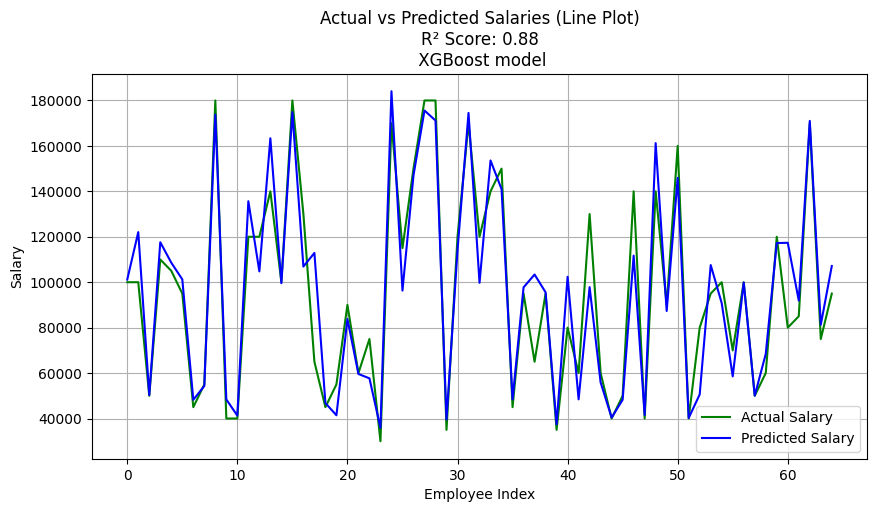

In [48]:
# Plotting the graph with the best model i.e XGBoost using line plot
# For plotting we need y_predict values so we are performing traing again to get thesse values
algo_final=XGBRegressor(n_estimators=100, random_state=42)
pipe = Pipeline([
        ("prep", preprocessor),
        ("model", algo_final)
    ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Salary', color='green')
plt.plot(y_pred, label='Predicted Salary', color='blue')
plt.xlabel("Employee Index")
plt.ylabel("Salary")
plt.title(f"Actual vs Predicted Salaries (Line Plot)\nR² Score: {r2:.2f}\n XGBoost model")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
# There are about 371 unique job titles saving them in a file
unique_jobs=df['Job Title'].unique().tolist()
import json
with open("job_titles.json", "w") as f:
    json.dump(unique_jobs, f)

### Now over model is ready. To turn it into a fully working web application we will be using Streamlit (app.py)